## Jupyter notebook for plotting the CHi-C, ATAC-seq and RNA-seq data of MYC and FOXO1 

This notebook is the code for plotting Fig. 5b and Fig. 6b shown in the paper **"Analysis of chromatin organinization and gene expression in T cells identifies functional genes for rheumatoid arthritis"** by *Jing Yang, Amanda McGovern, Paul Martin, Kate Duffus, Xiangyu Ge, Peyman Zarrineh, Andrew P Morris, Antony Adamson, Peter Fraser, Magnus Rattray & Stephen Eyre* 

Author : *Jing Yang*  <br />
Date: 01-05-2020 <br />
For any questions about the code, please drop me a line at Jing.Yang@manchester.ac.uk

In [1]:
library(tidyverse)
library(gridExtra)
library(reshape2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
data <- read.table(file='data/ATACseq_CHiC_RNAseq_linked_withpromoter.txt', header=T)


### read ATAC-seq peaks associated with SNPs 

In [3]:
atacseq_withSNPs <- read.table(file='data/ATACseq_SNPs_associated.txt', header=T)

In [4]:
data_foxo1 <- data[data$ENSG=='ENSG00000150907',]
data_myc <- data[data$ENSG=='ENSG00000136997',]
data_foxo1_withsnps <- unique(merge(data_foxo1, atacseq_withSNPs))
data_myc_withsnps <- unique(merge(data_myc, atacseq_withSNPs))

In [5]:
data_myc_withsnps

,ATACchr,ATACstart,ATACend,otherEndID,otherEndchr,otherEndstart,otherEndend,ID,ENSG,ENSGchr,⋯,AT24H,corr_atacseq_gene,corr_atacseq_otherEnd,corr_gene_otherEnd,BIC_atacseq,LR_atacseq,BIC_chic,LR_chic,BIC_gene,LR_gene
,<fct>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr8,128543213,128544010,767526,chr8,128537323,128547773,67888,ENSG00000136997,chr8,⋯,7.709338,0.6701979,0.2027005,0.4027520,1.791906,0.000146398,1.588544,-0.2032151142,-20.18507,-21.97683
2,chr8,128554789,128555493,767531,chr8,128554717,128556578,67890,ENSG00000136997,chr8,⋯,6.868451,0.6000426,0.7559367,0.3900851,1.789831,-0.001928570,1.792101,0.0003410952,-20.18507,-21.97683


In [6]:
data_foxo1_withsnps

,ATACchr,ATACstart,ATACend,otherEndID,otherEndchr,otherEndstart,otherEndend,ID,ENSG,ENSGchr,⋯,AT24H,corr_atacseq_gene,corr_atacseq_otherEnd,corr_gene_otherEnd,BIC_atacseq,LR_atacseq,BIC_chic,LR_chic,BIC_gene,LR_gene
,<fct>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr13,39776707,39776942,190657,chr13,39772094,39779118,17281,ENSG00000150907,chr13,⋯,6.599204,-0.9549138,0.9251248,-0.8456849,-4.217461,-6.009221,1.722251,-0.06950797,-3.593549,-5.385309


Using label as id variables

Using label as id variables

Using label as id variables



,label,variable,value
,<chr>,<fct>,<dbl>
1,ATAC-seq1,0m,7.430788
2,ATAC-seq2,0m,6.945120
3,ATAC-seq1,20m,7.228131
4,ATAC-seq2,20m,6.868308
5,ATAC-seq1,1hr,8.471216
6,ATAC-seq2,1hr,7.773672


,label,variable,value
,<chr>,<fct>,<dbl>
1,CHiC1,0m,4.425080
2,CHiC2,0m,4.214154
3,CHiC1,20m,4.973384
4,CHiC2,20m,4.321237
5,CHiC1,1hr,4.936805
6,CHiC2,1hr,4.697980


,label,variable,value
,<chr>,<fct>,<dbl>
1,RNA-seq,0m,10.64134
2,RNA-seq,20m,10.63523
3,RNA-seq,1hr,12.33984
4,RNA-seq,4hr,14.50914
5,RNA-seq,24hr,12.92888


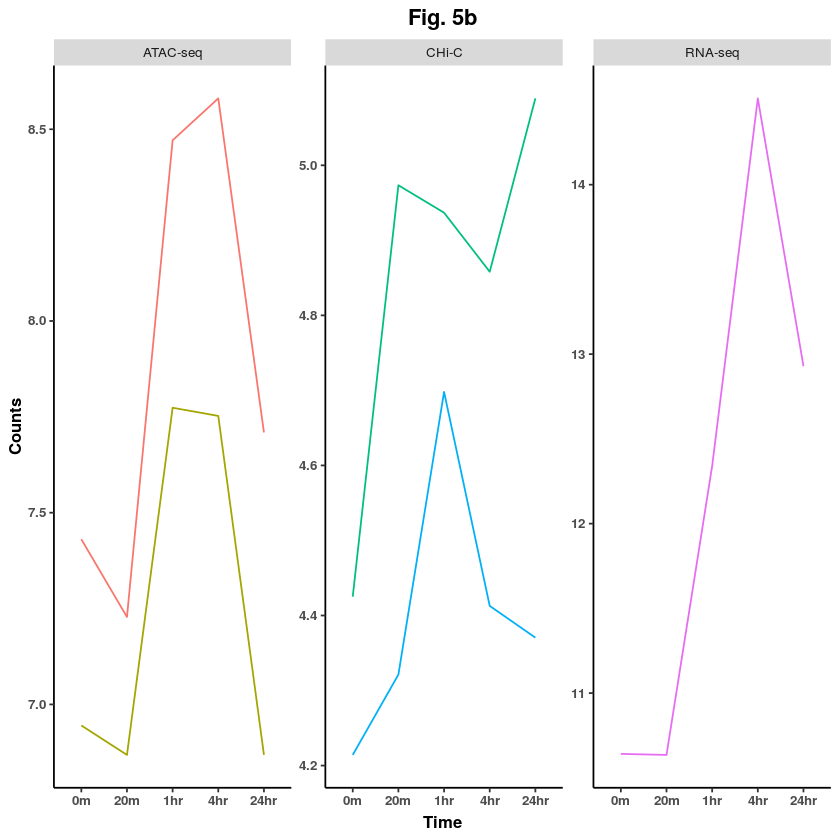

In [7]:
myc_atacseq <- unique(data_myc_withsnps[,c('AT0','AT20','AT1H','AT4H','AT24H')])
names(myc_atacseq) <- c('0m','20m','1hr','4hr','24hr')
myc_atacseq$label <- paste('ATAC-seq',1:dim(myc_atacseq)[1],sep='')
melted_myc_atacseq <- melt(myc_atacseq)

myc_chic <- unique(data_myc_withsnps[,c('T0','T20','T1H','T4H','T24H')])
names(myc_chic) <- c('0m','20m','1hr','4hr','24hr')
myc_chic$label <- paste('CHiC', 1:dim(myc_chic)[1],sep='')
melted_myc_chic <- melt(myc_chic)

myc_gene <- unique(data_myc_withsnps[,c('ET0_a','ET20_a','ET1H_a','ET4H_a','ET24H_a')])
names(myc_gene) <- c('0m','20m','1hr','4hr','24hr')
#names(myc_gene) <- c('T0','T20','T1H','T4H','T24H')
myc_gene$label <- c('RNA-seq')
melted_myc_gene <- melt(myc_gene)

#myc_corr <- data_myc_withsnps[,c('corr_atacseq_gene', 'corr_atacseq_otherEnd','corr_gene_otherEnd')]
#names(myc_corr) <- c('atac_gene','atac_chic','gene_chic')
#myc_corr$label <- 1:dim(myc_corr)[1]
#melted_myc_corr <- melt(myc_corr,id='label')
#melted_myc_corr$label2 <- 'correlation'

head(melted_myc_atacseq)
head(melted_myc_chic)
head(melted_myc_gene)
melted_myc_atacseq$label2 <- 'ATAC-seq'
melted_myc_chic$label2 <- 'CHi-C'
melted_myc_gene$label2 <- 'RNA-seq'

melted_myc <- rbind(melted_myc_atacseq, melted_myc_chic, melted_myc_gene)

p_myc <- ggplot() + geom_line(data=melted_myc, aes(x=variable, y=value, group=label,color=label))  + 
theme(panel.background=element_blank(), plot.title = element_text(hjust = 0.5, face='bold'), 
         axis.line=element_line(), strip.text = element_text(size=8),
         axis.text=element_text(size=8, face='bold'),axis.title=element_text(size=10,face="bold"), legend.position="none") + 
#geom_text(data=melted_myc, aes(x=))
#geom_tile(data=melted_myc_corr, aes(y=as.numeric(label), x=variable, fill=value)) +
scale_fill_gradient2(low = "red", mid = "white",
  high = "blue") +
xlab('Time') + ylab('Counts') + ggtitle('Fig. 5b') + 
facet_wrap(.~label2, scales = "free",ncol=3)
p_myc


Using label as id variables

Using label as id variables

Using label as id variables



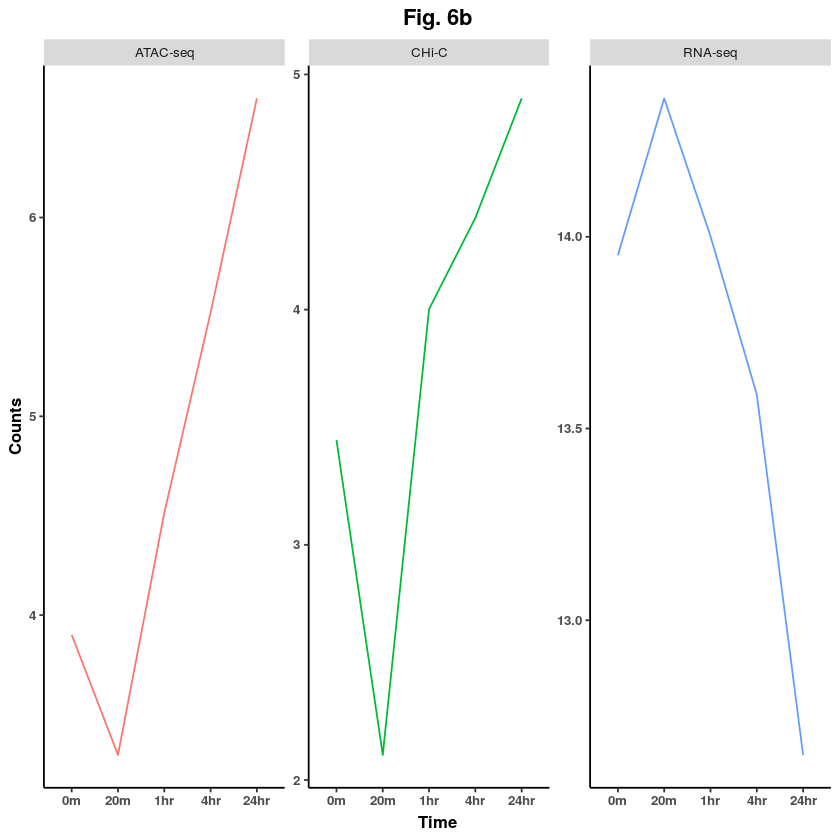

In [8]:
foxo1_atacseq <- unique(data_foxo1_withsnps[,c('AT0','AT20','AT1H','AT4H','AT24H')])
names(foxo1_atacseq) <- c('0m','20m','1hr','4hr','24hr')
foxo1_atacseq$label <- paste('ATAC-seq',1:dim(foxo1_atacseq)[1],sep='')
melted_foxo1_atacseq <- melt(foxo1_atacseq)

foxo1_chic <- unique(data_foxo1_withsnps[,c('T0','T20','T1H','T4H','T24H')])
names(foxo1_chic) <- c('0m','20m','1hr','4hr','24hr')
foxo1_chic$label <- paste('CHiC', 1:dim(foxo1_chic)[1],sep='')
melted_foxo1_chic <- melt(foxo1_chic)

foxo1_gene <- unique(data_foxo1_withsnps[,c('ET0_a','ET20_a','ET1H_a','ET4H_a','ET24H_a')])
names(foxo1_gene) <- c('0m','20m','1hr','4hr','24hr')
#names(foxo1_gene) <- c('T0','T20','T1H','T4H','T24H')
foxo1_gene$label <- c('RNA-seq')
melted_foxo1_gene <- melt(foxo1_gene)

#foxo1_corr <- data_foxo1_withsnps[,c('corr_atacseq_gene', 'corr_atacseq_otherEnd','corr_gene_otherEnd')]
#names(foxo1_corr) <- c('atac_gene','atac_chic','gene_chic')
#foxo1_corr$label <- 1:dim(foxo1_corr)[1]
#melted_foxo1_corr <- melt(foxo1_corr,id='label')
#melted_foxo1_corr$label2 <- 'correlation'

melted_foxo1_atacseq$label2 <- 'ATAC-seq'
melted_foxo1_chic$label2 <- 'CHi-C'
melted_foxo1_gene$label2 <- 'RNA-seq'

melted_foxo1 <- rbind(melted_foxo1_atacseq, melted_foxo1_chic, melted_foxo1_gene)

p_foxo1 <- ggplot() + geom_line(data=melted_foxo1, aes(x=variable, y=value, group=label,color=label))  + 
theme(panel.background=element_blank(), plot.title = element_text(hjust = 0.5, face='bold'), 
         axis.line=element_line(),strip.text = element_text(size=8),
         axis.text=element_text(size=8, face='bold'),axis.title=element_text(size=10,face="bold"), legend.position="none") + 
#geom_text(data=melted_foxo1, aes(x=))
#geom_tile(data=melted_foxo1_corr, aes(y=as.numeric(label), x=variable, fill=value)) +
scale_fill_gradient2(low = "red", mid = "white",
  high = "blue") +
xlab('Time') + ylab('Counts') + ggtitle('Fig. 6b') + 
facet_wrap(.~label2, scales = "free",ncol=3)
p_foxo1
